In [1]:
import seaborn as sns

titanic_df = sns.load_dataset("titanic")

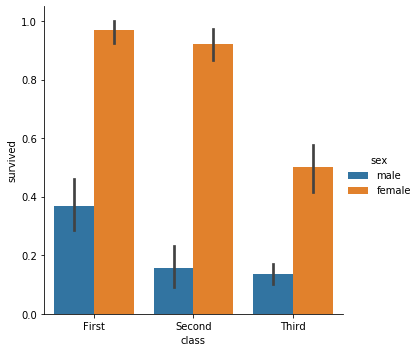

In [2]:
sns.catplot('class', 'survived', hue='sex', data = titanic_df, kind='bar')

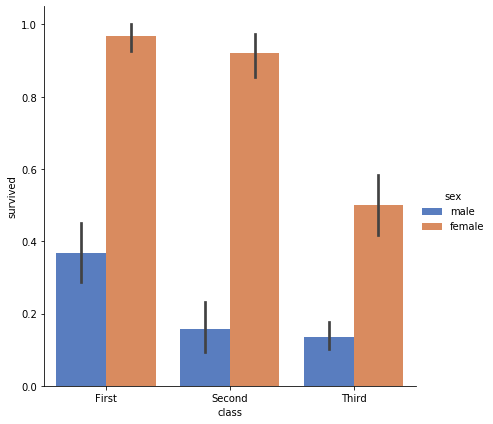

In [3]:
sns.catplot('class', 'survived', hue='sex', data = titanic_df, kind='bar', height=6, palette="muted")

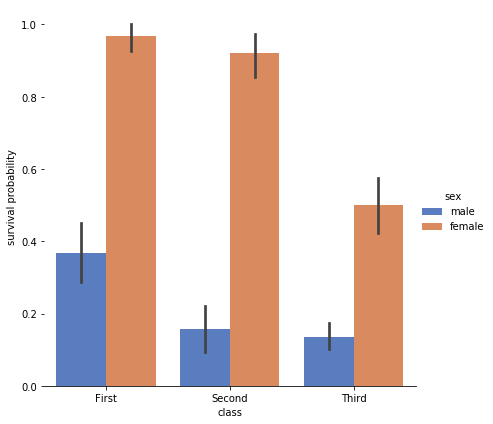

In [4]:
g = sns.catplot('class', 'survived', hue='sex', data = titanic_df, kind='bar', height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

카테고리컬한 컬럼값에 따라서 subplot을 표현을 해줄때 catplot을 많이 사용한다.

In [5]:
import seaborn as sns
sns.set(style="whitegrid")

df = sns.load_dataset("exercise")

In [6]:
df.shape

(90, 6)

저장할때 index=False로 저장을 안해서 Unamed: 0 이 나오는 것이다.

In [7]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [8]:
df.kind.value_counts()

running    30
walking    30
rest       30
Name: kind, dtype: int64

ci는 confidence intervel로 신뢰구간을 의미하며 sd는 standard deviation으로 표준편차를 의미한다.
capsize를 넣으면 위의 캡의 크기를 조절 할 수 있다.

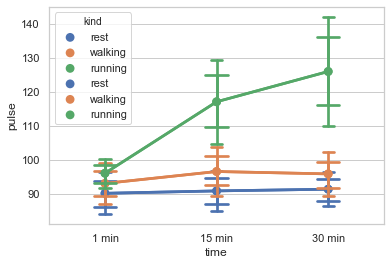

In [9]:
sns.pointplot(data=df, x="time", y="pulse", hue="kind", capsize=0.2)
sns.pointplot(data=df, x="time", y="pulse", hue="kind", ci="sd", capsize=.1)

kind를 point로 하면 위의 pointplot과 동일하게 나온다.

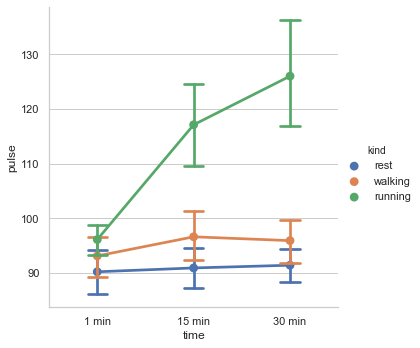

In [10]:
sns.catplot(data=df, x="time", y="pulse", hue="kind", capsize=.2, kind="point")

col에 피쳐이름을 넣으면 해당 피쳐의 카테고리에 따라 나뉘어져 subplot을 그린다.
그리고 표 위에 FacetGrid로 나와있는 걸 보니 catplot은 FacetGrid로 그린 것을 알 수 있다.

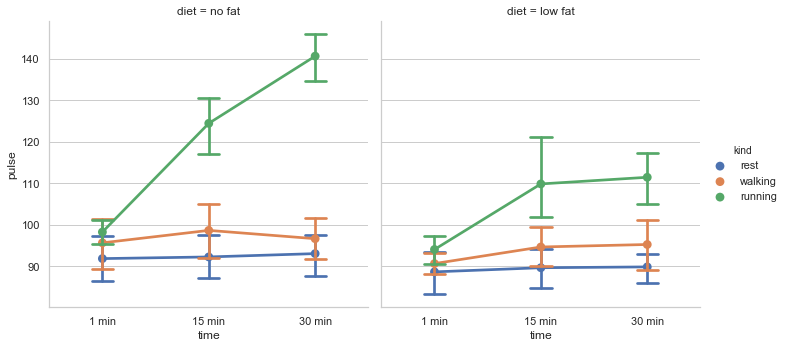

In [11]:
sns.catplot(data=df, x="time", y="pulse", hue="kind", col="diet", capsize=.2, kind="point")

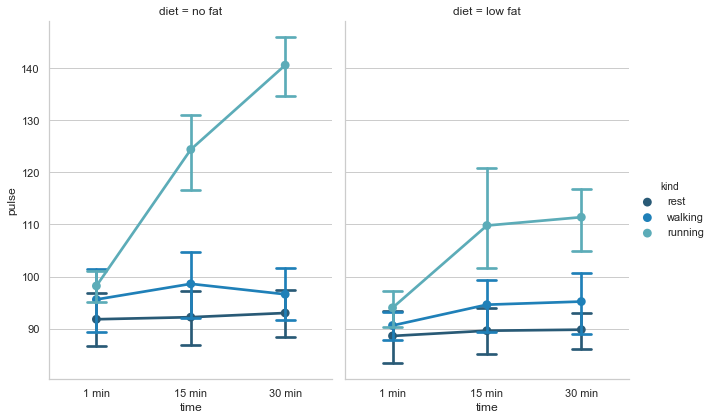

In [12]:
sns.catplot(data=df, x="time", y="pulse", hue="kind", col="diet",
            capsize=.2, kind="point", palette="YlGnBu_d", height=6, aspect=.75,)

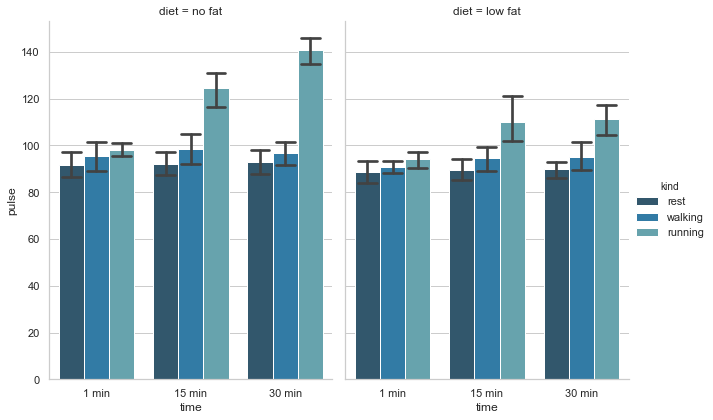

In [13]:
sns.catplot(data=df, x="time", y="pulse", hue="kind", col="diet",
            capsize=.2, kind="bar", palette="YlGnBu_d", height=6, aspect=.75,)

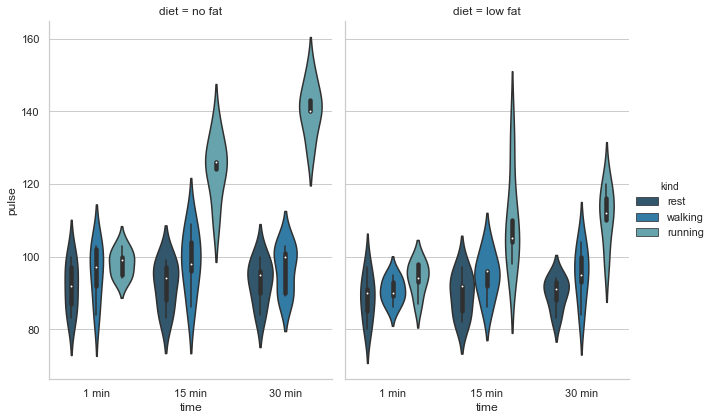

In [14]:
sns.catplot(data=df, x="time", y="pulse", hue="kind", col="diet",
            capsize=.2, kind="violin", palette="YlGnBu_d", height=6, aspect=.75,)

FacetGrid를 이용하여 분산을 비교해보자

In [16]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [29]:
df['kind'].value_counts()

running    30
walking    30
rest       30
Name: kind, dtype: int64

In [20]:
df.query("kind == 'rest'").head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [23]:
df[df['kind'] == 'rest'].head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [27]:
rest = df.query("kind == 'rest'")['pulse']
rest.var()

34.00574712643678

In [31]:
walking = df.query("kind == 'walking'")['pulse']
walking.var()

45.95862068965517

In [32]:
running = df[df['kind'] == 'running']['pulse']
running.var()

310.4781609195402

각각의 분산을 구했는데 표준편차를 구해보자

In [38]:
import numpy as np

In [40]:
print('rest 표준편차: ', np.sqrt(rest.var()))
print('walking 표준편차: ', walking.var() ** 0.5)
print('running 표준편차: ', running.var() ** 0.5)

rest 표준편차:  5.831444686047942
walking 표준편차:  6.779278773561032
running 표준편차:  17.62039048714699


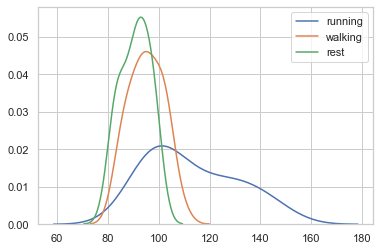

In [36]:
sns.kdeplot(running, label='running')
sns.kdeplot(walking, label = 'walking')
sns.kdeplot(rest, label = 'rest')

FacetGrid

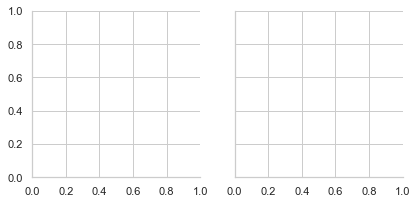

In [41]:
sns.FacetGrid(df, col='diet')

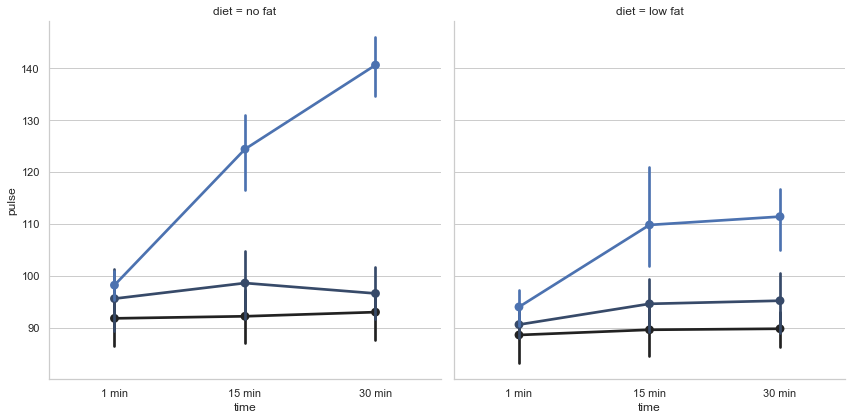

In [47]:
g = sns.FacetGrid(df, col='diet', height=6)
g.map(sns.pointplot, 'time', 'pulse', 'kind')

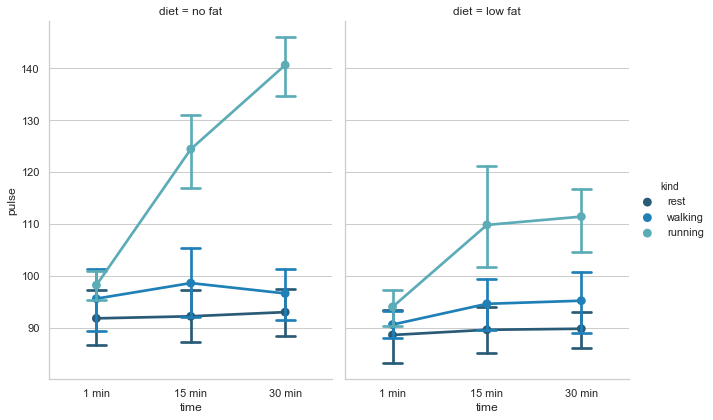

In [48]:
sns.catplot(data=df, x="time", y="pulse", hue="kind", col="diet",
            capsize=.2, kind="point", palette="YlGnBu_d", height=6, aspect=.75,)